In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss, f1_score
from sklearn.svm import LinearSVC
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
import datetime
from scipy import stats
%matplotlib inline

In [9]:
df_2016 = pd.read_csv('2016_df.csv', parse_dates='Created_Date')
df_2015 = pd.read_csv('2015_df.csv', parse_dates='Created_Date')
df_2014 = pd.read_csv('2014_df.csv', parse_dates='Created_Date')

In [10]:
df_2014['day'] = df_2014.index
df_2015['day'] = df_2015.index
df_2016['day'] = df_2016.index

In [11]:
df_2014 = df_2014.set_index('Created_Date')
df_2015 = df_2015.set_index('Created_Date')
#df_2016 = df_2016.set_index('Created_Date')
df_2016 = df_2016[df_2016['Created_Date'] != '2016-02-29']

In [12]:
df_2016 = df_2016.replace(to_replace="-", value=0)

In [13]:
train_years = pd.concat([df_2014, df_2015])

In [71]:
df_weather = pd.get_dummies(train_years['Weather'])

In [72]:
train_years = pd.concat([train_years, df_weather],axis=1,join='inner')

In [73]:
train_years.drop('Weather', axis=1, inplace=True)

In [1]:
complaint_type = ['Building_Conditions', 'General_Request', 
                 'Living_Conditions', 'Parking_Enforcement', 
                 'Signal_Sign_Repair', 'Street_Sidewalk_Repair']

weather_types = ['Building_Conditions', 'Max_TempF', 'Fog', 'Fog-Rain', 'Fog-Rain-Snow', 
                 'Fog-Rain-Thunderstorm', 'Fog-Snow',
                 'Rain', 'Rain-Snow',
                 'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm',
                 'Snow', 'Sunny']

feature_cols = ['General_Request', 
                'Living_Conditions', 'Parking_Enforcement', 
                'Signal_Sign_Repair', 'Street_Sidewalk_Repair',
                'Max_TempF', 'day',
                'Fog', 'Fog-Rain',
                'Fog-Rain-Snow', 
                'Fog-Rain-Thunderstorm', 'Fog-Snow',
                'Rain', 'Rain-Snow',
                'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm',
                'Snow', 'Sunny']

X = train_years[weather_types]
y = train_years['Building_Conditions']

NameError: name 'train_years' is not defined

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [96]:
clf = LogisticRegression()

In [97]:
clf = clf.fit(X_train, y_train)

In [98]:
pred_train = clf.predict_proba(X_train)
pred_test = clf.predict_proba(X_test)

In [99]:
print log_loss(y_train, pred_train)
print f1_score(y_train, np.round(pred_train[:,1]))

2.65682972089
0.0


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [100]:
clf.score(X_test, y_test)

0.054794520547945202

In [112]:
df_pred = pd.DataFrame({'pred':clf.predict(X_test),'actual':y_test})

In [113]:
df_pred.sort_index(axis=0, inplace=True)

# 2014

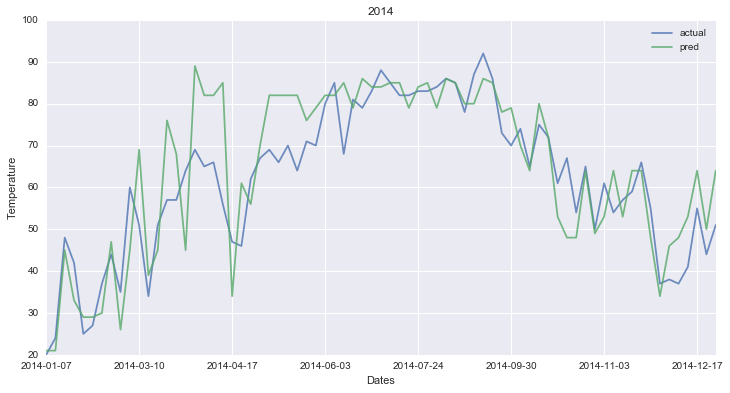

In [116]:
df_pred[pd.to_datetime(df_pred.index).year==2014].plot(kind='line', figsize=(12,6),alpha=.8)
plt.title('2014')
plt.xlabel('Dates')
plt.ylabel('Temperature')

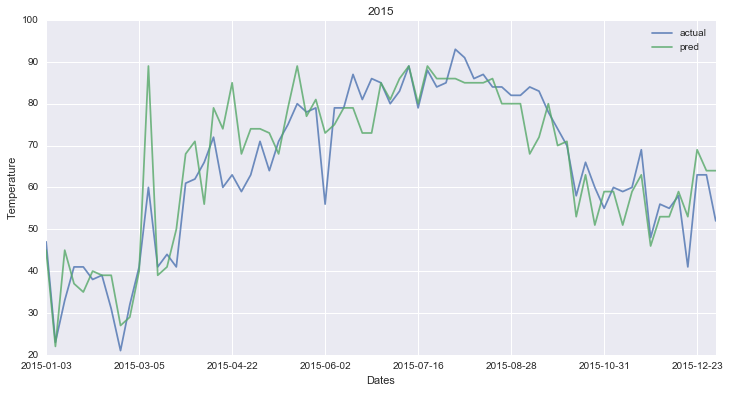

In [117]:
df_pred[pd.to_datetime(df_pred.index).year==2015].plot(kind='line', figsize=(12,6),alpha=.8)
plt.title('2015')
plt.xlabel('Dates')
plt.ylabel('Temperature')

In [103]:
models = [('LinearRegression',LinearRegression())
          ,('LogisticRegression',LogisticRegression())
          ,('LinearSVC',LinearSVC())
          ,('SVR',SVR())]

scores = {}
for name, model in models:
    model.fit(X_train, y_train)
    result = model.score(X_test,y_test)
    scores[name] = result

In [104]:
pd.DataFrame(scores,index=[0])

,LinearRegression,LinearSVC,LogisticRegression,SVR
0,1,0.020548,0.054795,-0.003713
